In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
import seaborn as sns
from sklearn import datasets, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print train.shape
print test.shape

(42000, 785)
(28000, 784)


In [6]:
train_images = (train.ix[:, 1:].values).astype('float32')
train_labels = train.ix[:, 0].values.astype('int32')

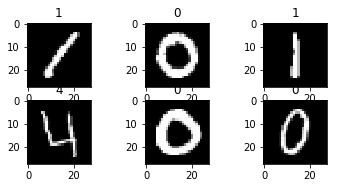

In [7]:
train_plot = train_images.reshape(train_images.shape[0],  28, 28)

for i in range(0, 6):
    plt.subplot(330 + (i+1))
    plt.imshow(train_plot[i], cmap = plt.get_cmap('gray'))
    plt.title(train_labels[i])

In [8]:
print train_images.shape
print test.shape

(42000, 784)
(28000, 784)


In [9]:
#null accuracy

train['label'].value_counts() / train.shape[0]

1    0.111524
7    0.104786
3    0.103595
9    0.099714
2    0.099452
6    0.098500
0    0.098381
4    0.096952
8    0.096738
5    0.090357
Name: label, dtype: float64

In [12]:
#train test split

X, y = train.drop('label', axis = 1), train['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [13]:
#random forest

rand_forest = RandomForestClassifier(n_estimators = 100)
rand_forest.fit(X_train, y_train)
rand_forest.score(X_test, y_test)

0.96542857142857141

In [25]:
rand_forest = RandomForestClassifier(n_estimators = 500)
rand_forest.fit(X_train, y_train)
rand_forest.score(X_test, y_test)

0.96704761904761904

In [26]:
#parameter tuning, warning: SLOW

scores = []
for i in range(100, 600, 100):
    rand_forest = RandomForestClassifier(n_estimators = i)
    rand_forest.fit(X_train, y_train)
    scores.append(rand_forest.score(X_test, y_test))
    
scores

[0.96419047619047615,
 0.9656190476190476,
 0.96790476190476193,
 0.96780952380952379,
 0.96714285714285719]

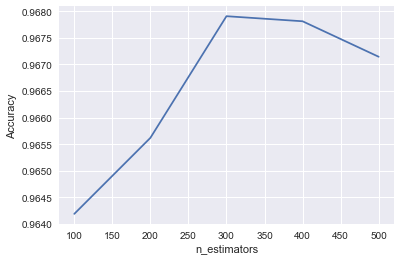

In [27]:
plt.plot(range(100, 600, 100), scores)
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")

In [28]:
rand_forest = RandomForestClassifier(n_estimators = 100)
rand_forest.fit(X_train, y_train)
result = rand_forest.predict(test)

In [29]:
result = pd.DataFrame(result)
result.columns = ['Label']
result.head()

,Label
0,2
1,0
2,9
3,9
4,3


In [30]:
result.to_csv('submission.csv', sep = ',', index = True, index_label = 'ImageId')